In [12]:
import numpy as np
import scipy
from scipy import io
from scipy import special
import matplotlib.pyplot as plt
import pandas as pd

Question #3

In [13]:
def partition(data, labels):

    np.random.seed(10)
    permuted_data = np.random.permutation(data)

    np.random.seed(10)
    permuted_labels = np.random.permutation(labels)

    valiadation_data = permuted_data[:1000]
    training_data = permuted_data[1000:]

    valiadation_labels = permuted_labels[:1000]
    training_labels = permuted_labels[1000:]

    return training_data, training_labels, valiadation_data, valiadation_labels

Part 2

In [14]:
#Takes about 30 seconds to run

loaded = scipy.io.loadmat("data.mat")
test_data = loaded["X_test"]
all_train_data = loaded["X"]
all_train_labels = loaded["y"]


#Partition training data in train and validation set 
training_data, training_labels, valiadation_data, valiadation_labels = partition(all_train_data, all_train_labels)

#Normalizing train and validaiton data 

training_mean  = [np.mean(training_data[:,i]) for i in range(12)]

#when doing the mean with axis = 0, we get weird rounding errors. I would rather them all just be their full decimal values with no roudning 
#other_meean = np.mean(training_data, axis=0)

training_std = [np.std(training_data[:,i]) for i in range(12)]
for i in range(12):
    training_data[:,i] = training_data[:,i] - training_mean[i]
    training_data[:,i] = training_data[:,i]/training_std[i]
    valiadation_data[:,i] = valiadation_data[:,i] - training_mean[i]
    valiadation_data[:,i] = valiadation_data[:,i]/training_std[i]


#add a fictitious dimension
fictitious_train = np.ones((5000,1)) 
fictitious_validation = np.ones((1000,1)) 
training_data=np.append(training_data, fictitious_train, axis=1) 
valiadation_data=np.append(valiadation_data, fictitious_validation, axis=1) 

#Define the logistic function using scipy expit
def logistic_func(X, w):
    s = np.zeros(len(X))
    vec = X @ w 
    for i in range(len(X)):
        s[i] = scipy.special.expit(vec[i])
    return s

#Number of GD iterations
numiters = 10000
#Learning rate
eta =  .001
#L2 Penalty
lamb = .1
#Intials w
w = np.zeros((13,))
#List of costs
cost = []
#inital s
s =  logistic_func(training_data, w)
#cost before any iterations
cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
#Number of iterations it took to converge
finaliters = 0

for i in range(numiters):
    gradient =  np.reshape(np.dot(training_data.T, (np.reshape(s, (5000,1)) - training_labels)), (13,)) + lamb*w
    w = w - eta * gradient
    s = logistic_func(training_data, w)
    cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
    if (cost[i] - cost[i+1] < .0000001):
        finaliters = i + 1
        break
print(finaliters)

4887


Percent of validation correctly classified: 0.994



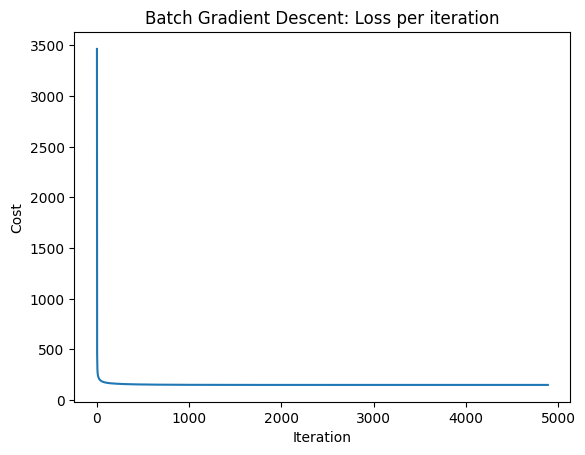

In [15]:
answers = logistic_func(valiadation_data, w)
answers = np.array([np.round(x) for x in answers])
answers = np.reshape(answers, (len(answers), 1))
correct = 0
for i in range(len(answers)):
    if answers[i][0] == valiadation_labels[i][0]:
        correct = correct + 1

print("Percent of validation correctly classified: " + str(correct/len(valiadation_labels)) + "\n")

iteration = [i for i in range(finaliters + 1)]
plt.plot(iteration,cost) 
plt.xlabel("Iteration") 
plt.ylabel("Cost") 
plt.title("Batch Gradient Descent: Loss per iteration")
plt.show()


Part 4

In [16]:
#Takes about one minute to run

loaded = scipy.io.loadmat("data.mat")
test_data = loaded["X_test"]
all_train_data = loaded["X"]
all_train_labels = loaded["y"]


#Partition training data in train and validation set 
training_data, training_labels, valiadation_data, valiadation_labels = partition(all_train_data, all_train_labels)

#Normalizing train and validaiton data 

training_mean  = [np.mean(training_data[:,i]) for i in range(12)]

#when doing the mean with axis = 0, we get weird rounding errors. I would rather them all just be their full decimal values with no roudning 
#other_meean = np.mean(training_data, axis=0)

training_std = [np.std(training_data[:,i]) for i in range(12)]
for i in range(12):
    training_data[:,i] = training_data[:,i] - training_mean[i]
    training_data[:,i] = training_data[:,i]/training_std[i]
    valiadation_data[:,i] = valiadation_data[:,i] - training_mean[i]
    valiadation_data[:,i] = valiadation_data[:,i]/training_std[i]


#add a fictitious dimension
fictitious_train = np.ones((5000,1)) 
fictitious_validation = np.ones((1000,1)) 
training_data=np.append(training_data, fictitious_train, axis=1) 
valiadation_data=np.append(valiadation_data, fictitious_validation, axis=1) 

#Define the logistic function using scipy expit
def logistic_func(X, w):
    s = np.zeros(len(X))
    vec = X @ w 
    for i in range(len(X)):
        s[i] = scipy.special.expit(vec[i])
    return s

#Number of GD iterations
numiters = 10000
#Learning rate
eta =  .01
#L2 Penalty
lamb = .1
#Intials w
w = np.zeros((13,))
#List of costs
cost = []
#inital s
s =  logistic_func(training_data, w)
#cost before any iterations
cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
#Number of iterations it took to converge
finaliters = 0
#list to randomly grab sample points
points = [i for i in range(len(training_data))]
np.random.seed(10)
np.random.shuffle(points)

for i in range(numiters):
    if len(points) == 0:
        points = [i for i in range(len(training_data))]
        np.random.seed(i)
        np.random.shuffle(points)
    datapoint = points.pop()
    chosen_x = training_data[datapoint]
    gradient =  np.reshape(np.dot(np.reshape(chosen_x.T, (13,1)), (s[datapoint] - training_labels[datapoint])), (13,)) + lamb*w
    w = w - eta * gradient
    s = logistic_func(training_data, w)
    cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
    if (abs(cost[i] - cost[i+1]) < .0000001):
        finaliters = i + 1
        break
print(finaliters)

0


Percent of validation correctly classified: 0.99



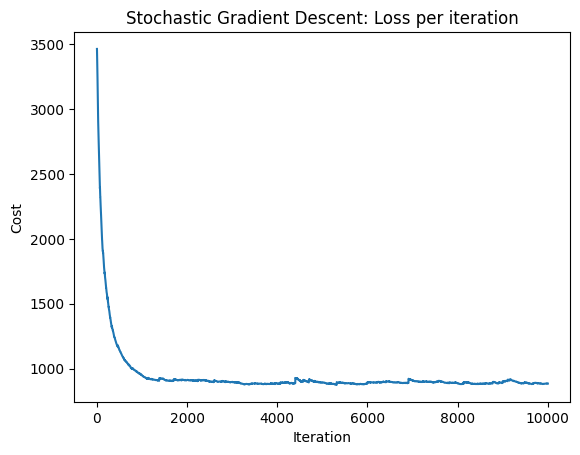

In [17]:
if (finaliters == 0):
    finaliters = numiters
answers = logistic_func(valiadation_data, w)
answers = np.array([np.round(x) for x in answers])
answers = np.reshape(answers, (len(answers), 1))
correct = 0
for i in range(len(answers)):
    if answers[i][0] == valiadation_labels[i][0]:
        correct = correct + 1

print("Percent of validation correctly classified: " + str(correct/len(valiadation_labels)) + "\n")

iteration = [i for i in range(finaliters + 1)]
plt.plot(iteration,cost) 
plt.xlabel("Iteration") 
plt.ylabel("Cost") 
plt.title("Stochastic Gradient Descent: Loss per iteration")
plt.show()

cost_nondecay = [x for x in cost]
iter_nondecay = [i for i in range(finaliters + 1)]

Compared to batch gradient descent, stochastic gradient descent converges to a higher loss. However, even though stochastic gradient descent converges to a higher loss, it obtains a much better accuracy score on the validation data. In terms of convergence, it seems that batch gradient descent converges much faster than stochastic gradient descent. I set my convergence cutoff to be .0000001, and batch gradient descent hit this in 4887 iterations, while stochastic gradient descent did not hit this cutoff in 10000 iterations. I beleive this is due to the much higher learning rate I set for stochastic gradient descent, but the reason I had a higher learning rate was because it resulted in a much better validation accuracy for the number of iterations I wanted to do. It seems that stochastic gradient descent is slower with a higher loss, most likely due to the l2 penalization, but creates a more accurate model for predicting labels.

Part 5

In [18]:
#Takes about one minute to run

loaded = scipy.io.loadmat("data.mat")
test_data = loaded["X_test"]
all_train_data = loaded["X"]
all_train_labels = loaded["y"]


#Partition training data in train and validation set 
training_data, training_labels, valiadation_data, valiadation_labels = partition(all_train_data, all_train_labels)

#Normalizing train and validaiton data 

training_mean  = [np.mean(training_data[:,i]) for i in range(12)]

#when doing the mean with axis = 0, we get weird rounding errors. I would rather them all just be their full decimal values with no roudning 
#other_meean = np.mean(training_data, axis=0)

training_std = [np.std(training_data[:,i]) for i in range(12)]
for i in range(12):
    training_data[:,i] = training_data[:,i] - training_mean[i]
    training_data[:,i] = training_data[:,i]/training_std[i]
    valiadation_data[:,i] = valiadation_data[:,i] - training_mean[i]
    valiadation_data[:,i] = valiadation_data[:,i]/training_std[i]


#add a fictitious dimension
fictitious_train = np.ones((5000,1)) 
fictitious_validation = np.ones((1000,1)) 
training_data=np.append(training_data, fictitious_train, axis=1) 
valiadation_data=np.append(valiadation_data, fictitious_validation, axis=1) 

#Define the logistic function using scipy expit
def logistic_func(X, w):
    s = np.zeros(len(X))
    vec = X @ w 
    for i in range(len(X)):
        s[i] = scipy.special.expit(vec[i])
    return s

#Number of GD iterations
numiters = 10000
#Learning rate
delta =  1
#L2 Penalty
lamb = .1
#Intials w
w = np.zeros((13,))
#List of costs
cost = []
#inital s
s =  logistic_func(training_data, w)
#cost before any iterations
cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
#Number of iterations it took to converge
finaliters = 0
#list to randomly grab sample points
points = [i for i in range(len(training_data))]
np.random.seed(10)
np.random.shuffle(points)

for i in range(numiters):
    eta = delta / (i+1)
    if len(points) == 0:
        points = [i for i in range(len(training_data))]
        np.random.seed(i)
        np.random.shuffle(points)
    datapoint = points.pop()
    chosen_x = training_data[datapoint]
    gradient =  np.reshape(np.dot(np.reshape(chosen_x.T, (13,1)), (s[datapoint] - training_labels[datapoint])), (13,)) + lamb*w
    w = w - eta * gradient
    s = logistic_func(training_data, w)
    cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
    if (abs(cost[i] - cost[i+1]) < .0000001):
        finaliters = i + 1
        break
print(finaliters)

0


Percent of validation correctly classified: 0.988



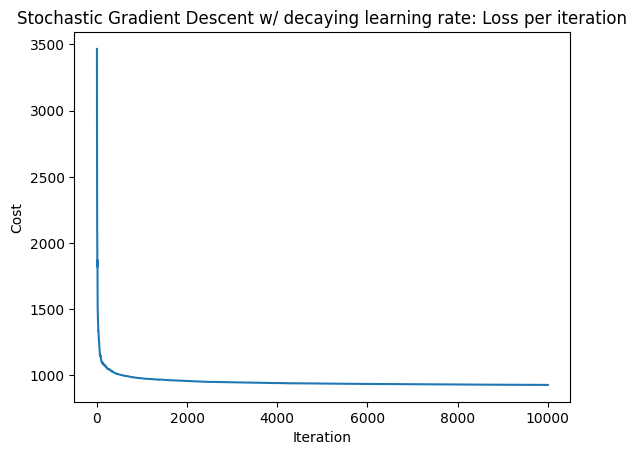

In [19]:
if (finaliters == 0):
    finaliters = numiters
answers = logistic_func(valiadation_data, w)
answers = np.array([np.round(x) for x in answers])
answers = np.reshape(answers, (len(answers), 1))
correct = 0
for i in range(len(answers)):
    if answers[i][0] == valiadation_labels[i][0]:
        correct = correct + 1

print("Percent of validation correctly classified: " + str(correct/len(valiadation_labels)) + "\n")

iteration = [i for i in range(finaliters + 1)]
plt.plot(iteration,cost) 
plt.xlabel("Iteration") 
plt.ylabel("Cost") 
plt.title("Stochastic Gradient Descent w/ decaying learning rate: Loss per iteration")
plt.show()

cost_decay = [x for x in cost]
iter_decay = [i for i in range(finaliters + 1)]

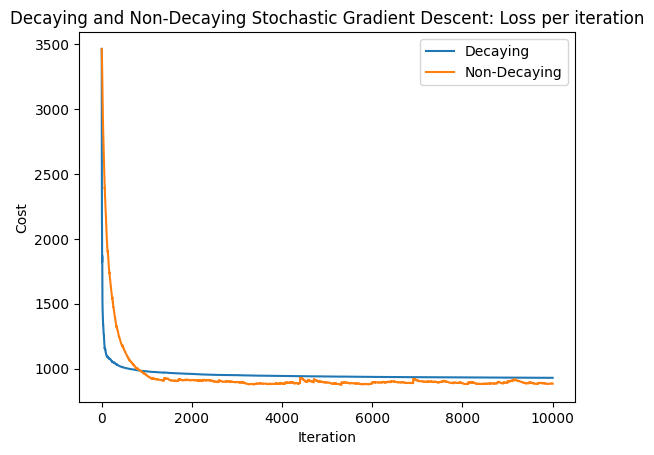

In [20]:
plt.plot(iter_decay,cost_decay, label = "Decaying") 
plt.plot(iter_nondecay,cost_nondecay, label = "Non-Decaying") 
plt.xlabel("Iteration") 
plt.ylabel("Cost") 
plt.title("Decaying and Non-Decaying Stochastic Gradient Descent: Loss per iteration")
plt.legend()
plt.show()

The convergence of the decaying SGD converges to a larger loss. It starts converging much faster in the beginning, but is unable to make substantial changes as it iterates more because its learning rate keeps getting smaller, which prevents it from further reducing the cost. Overall, decaying SGD converges faster, but to a worse loss, which also results in a worse validation accuracy.

Part 6

In [21]:
#Takes about one minute to run

loaded = scipy.io.loadmat("data.mat")
test_data = loaded["X_test"]
all_train_data = loaded["X"]
all_train_labels = loaded["y"]


#Partition training data in train and validation set 
training_data, training_labels, valiadation_data, valiadation_labels = partition(all_train_data, all_train_labels)

#Normalizing train and validaiton data 

training_mean  = [np.mean(training_data[:,i]) for i in range(12)]

#when doing the mean with axis = 0, we get weird rounding errors. I would rather them all just be their full decimal values with no roudning 
#other_meean = np.mean(training_data, axis=0)

training_std = [np.std(training_data[:,i]) for i in range(12)]
for i in range(12):
    training_data[:,i] = training_data[:,i] - training_mean[i]
    training_data[:,i] = training_data[:,i]/training_std[i]
    valiadation_data[:,i] = valiadation_data[:,i] - training_mean[i]
    valiadation_data[:,i] = valiadation_data[:,i]/training_std[i]
    test_data[:,i] = test_data[:,i] - training_mean[i]
    test_data[:,i] = test_data[:,i]/training_std[i]


#add a fictitious dimension
fictitious_train = np.ones((5000,1)) 
fictitious_validation = np.ones((1000,1)) 
fictitious_test = np.ones((497,1))
training_data=np.append(training_data, fictitious_train, axis=1) 
valiadation_data=np.append(valiadation_data, fictitious_validation, axis=1) 
test_data=np.append(test_data, fictitious_test, axis=1) 


#Define the logistic function using scipy expit
def logistic_func(X, w):
    s = np.zeros(len(X))
    vec = X @ w 
    for i in range(len(X)):
        s[i] = scipy.special.expit(vec[i])
    return s

#Number of GD iterations
numiters = 10000
#Learning rate
eta =  .01
#L2 Penalty
lamb = .1
#Intials w
w = np.zeros((13,))
#List of costs
cost = []
#inital s
s =  logistic_func(training_data, w)
#cost before any iterations
cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
#Number of iterations it took to converge
finaliters = 0
#list to randomly grab sample points
points = [i for i in range(len(training_data))]
np.random.seed(10)
np.random.shuffle(points)

for i in range(numiters):
    if len(points) == 0:
        points = [i for i in range(len(training_data))]
        np.random.seed(i)
        np.random.shuffle(points)
    datapoint = points.pop()
    chosen_x = training_data[datapoint]
    gradient =  np.reshape(np.dot(np.reshape(chosen_x.T, (13,1)), (s[datapoint] - training_labels[datapoint])), (13,)) + lamb*w
    w = w - eta * gradient
    s = logistic_func(training_data, w)
    cost.append((-1 * np.dot(training_labels.T, np.log(s))) - np.dot((1 - training_labels).T, np.log(1-s)) + (lamb/2) * (w.T @ w))
    if (abs(cost[i] - cost[i+1]) < .0000001):
        finaliters = i + 1
        break

In [22]:
def results_to_csv_wine(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('wine_submission.csv', index_label='Id')

In [23]:
if (finaliters == 0):
    finaliters = numiters
answers = logistic_func(valiadation_data, w)
answers = np.array([np.round(x) for x in answers])
answers = np.reshape(answers, (len(answers), 1))
correct = 0
for i in range(len(answers)):
    if answers[i][0] == valiadation_labels[i][0]:
        correct = correct + 1

kaggle_answers = logistic_func(test_data, w)
kaggle_answers = np.array([int(np.round(x)) for x in kaggle_answers])
results_to_csv_wine(kaggle_answers)


My best classifier randomly split the training data into training and validation data. There are 5000 training point and 1000 validation points. It then normalizes each of the data sets (test, train, validation) with the mean and standard deviation of the training set. After that, I simply run stochastic gradient descent (which I found was the best of three algorithms in the previous parts) on the training set with an l2 penalization of .1, a learning rate of .01, and 10,000 iterations. I use the w that this optimzation spits on the test set to get all of my labels.

Score: Score: 0.95967

Username: Dominic Ventimiglia

Question #5

In [24]:
def norm_dim_2(x, y, p):
    return (np.abs(x)**p + np.abs(y)**p)**(1/p)

x, y = np.mgrid[-10:10:.1, -10:10:.1]

A: 0.5 Norm:


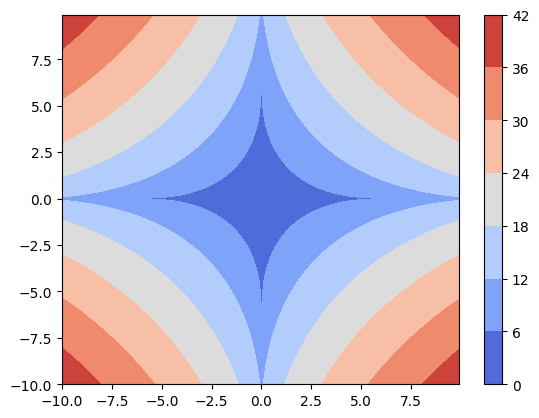

In [25]:
print("A: 0.5 Norm:")
plt.contourf(x, y, norm_dim_2(x,y, .5), cmap='coolwarm')
plt.colorbar()
plt.show()

B: 1 Norm:


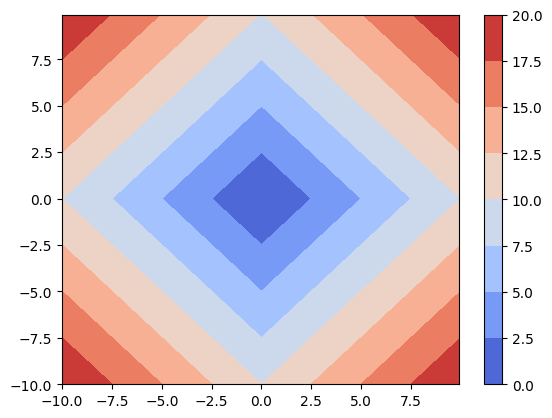

In [26]:
print("B: 1 Norm:")
plt.contourf(x, y, norm_dim_2(x,y, 1), cmap='coolwarm')
plt.colorbar()
plt.show()

C: 2 Norm:


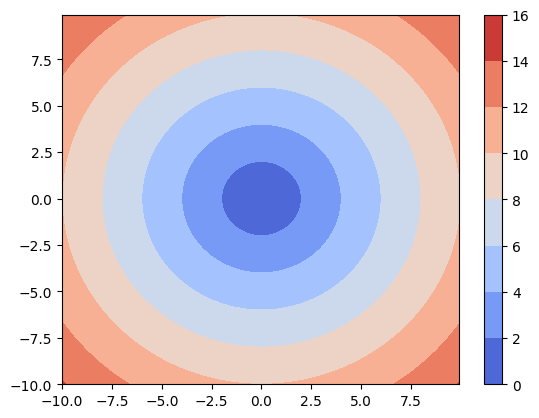

In [27]:

print("C: 2 Norm:")
plt.contourf(x, y, norm_dim_2(x,y, 2), cmap='coolwarm')
plt.colorbar()
plt.show()